In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
import nltk ## for processsing text 
from wordcloud  import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer ## text processing 
import missingno as mns ## checking for missing text 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
nltk.download("stopwords")
stop_words=stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Keneye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
df=pd.read_csv("Tweets_airport.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: >

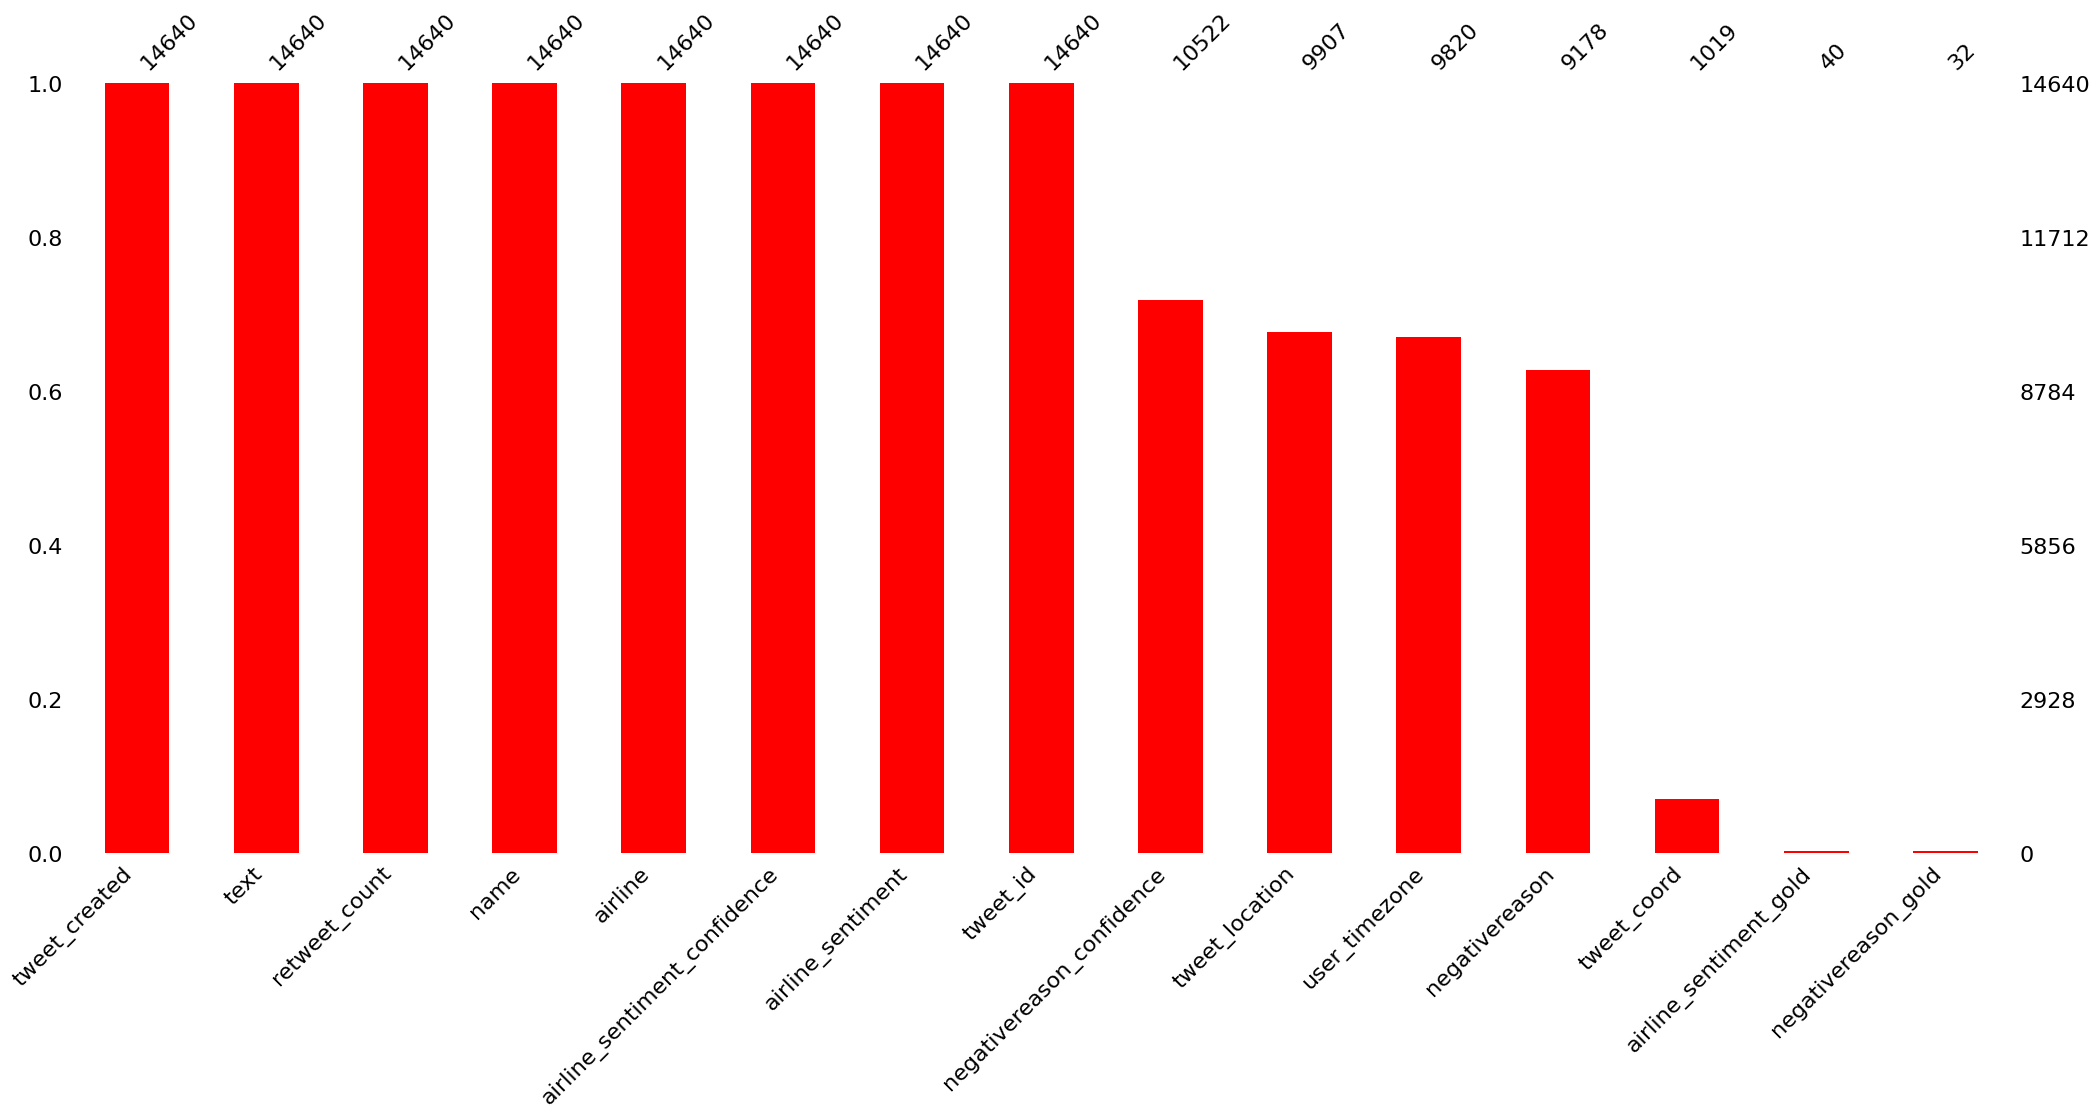

In [39]:
mns.bar(df,color="red",sort="descending")

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

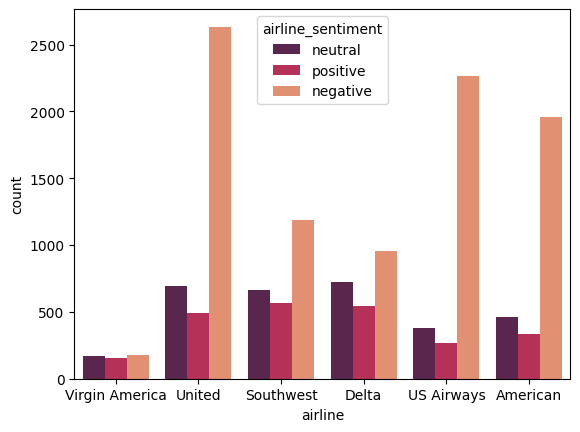

In [40]:
sns.countplot(df,x="airline",hue="airline_sentiment",palette="rocket")
plt.legend

In [41]:
fig=px.histogram(df,x="airline",color="negativereason",text_auto=True,barmode="group")
fig.show()

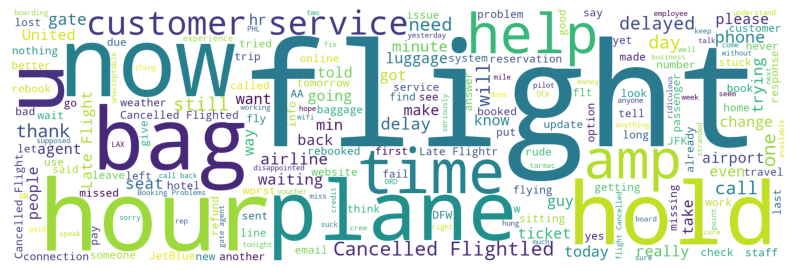

In [43]:
newdata=df[df["airline_sentiment"]=="negative"]
words=" ".join(newdata["text"])
# this line just extract 0;; the text data from the "text"column of the  newdata dataframe and join them into  a single string words
cleanword=" ".join([word for word in words.split()
                    if "http" not in word and not word.startswith("@")
                    and word !="RT"])

wc=WordCloud(stopwords=STOPWORDS,background_color="white",width=2000,height=650).generate(cleanword)
## this  line of code generate wordcloud class from the wordcloud library it takes parameter such as "stopwords"
##which is from the wordcloud library
plt.figure(1,figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

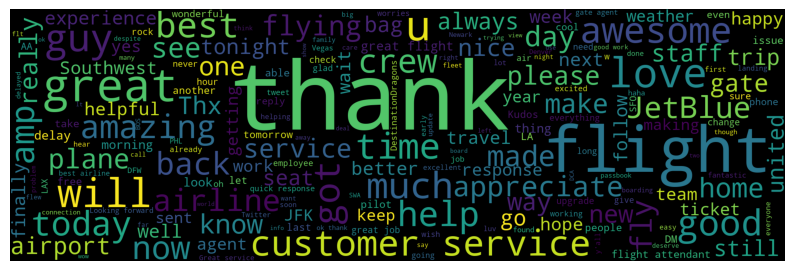

In [44]:
newdata=df[df["airline_sentiment"]=="positive"]
words=" ".join(newdata["text"])
cleanword=" ".join([word for word in words.split()
                    if "http" not in word and not word.startswith("@")
                    and word !="RT"])

wc=WordCloud(stopwords=STOPWORDS,background_color="black",width=2000,height=650).generate(cleanword)

plt.figure(1,figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

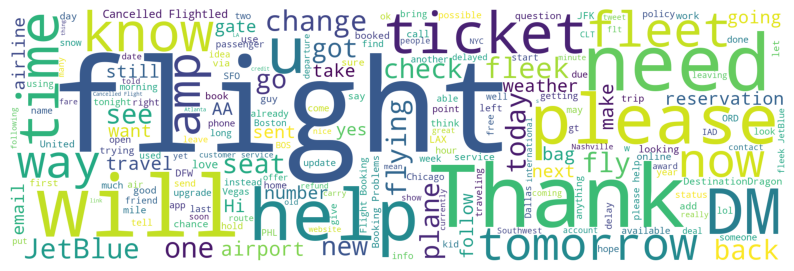

In [46]:
newdata=df[df["airline_sentiment"]=="neutral"]
words=" ".join(newdata["text"])
cleanword=" ".join([word for word in words.split()
                    if "http" not in word and not word.startswith("@")
                    and word !="RT"])

wc=WordCloud(stopwords=STOPWORDS,background_color="white",width=2000,height=650).generate(cleanword)

plt.figure(1,figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()
##this code plots the generate word cloud using matplotlib

In [69]:
##Text cleaner
text_cleaning_re="@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
# this line of code defines regular expression pattern in the text_cleaning_re

def preprocessing (x, stem=False):
    x=re.sub(text_cleaning_re," ",str(x).lower()).strip()
    tokens=[]
    for token in x.split("\n"):
        if token not in stop_words:
            if stem:
                token.append(SnowballStemmer.stem(token))
            else:
                tokens.append(token)
            return "".join(tokens)
       ## this function "preprocessing" takes a text input : "x" and performs preprocessing steps on it.
       
df.text=df.text.apply(lambda x:preprocessing(x))
        # this applys the preprocesssing stage function to the text

<>:2: SyntaxWarning:

invalid escape sequence '\S'

<>:2: SyntaxWarning:

invalid escape sequence '\S'

C:\Users\Keneye\AppData\Local\Temp\ipykernel_2428\1836605640.py:2: SyntaxWarning:

invalid escape sequence '\S'



In [51]:
df["text"].head()

0                                   what dhepburn said
1    plus you ve added commercials to the experienc...
2    i didn t today must mean i need to take anothe...
3    it s really aggressive to blast obnoxious ente...
4             and it s a really big bad thing about it
Name: text, dtype: object

In [ ]:
sentiment

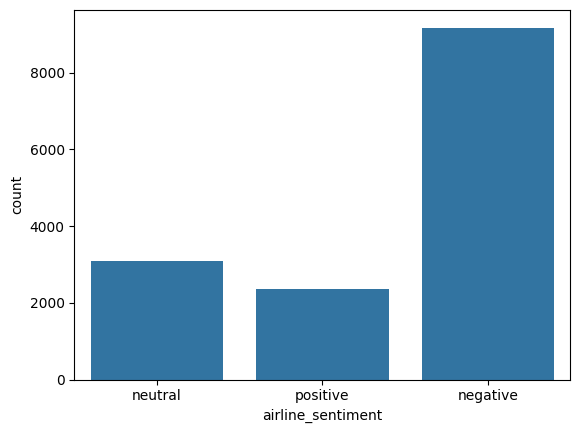

In [52]:
sns.countplot(x="airline_sentiment",data=df)
plt.show()

In [72]:
from sklearn.utils import resample
df_negative=df[df["airline_sentiment"]=="negative"]
df_neutral=df[df["airline_sentiment"]=="neutral"]
df_positive=df[df["airline_sentiment"]== "positive"]

dfsam1=resample(df_positive,n_samples=9178)
dfsam2=resample(df_neutral,n_samples=9178)
df= pd.concat([df_negative,dfsam1,dfsam2])
df= df.sample(frac=1)

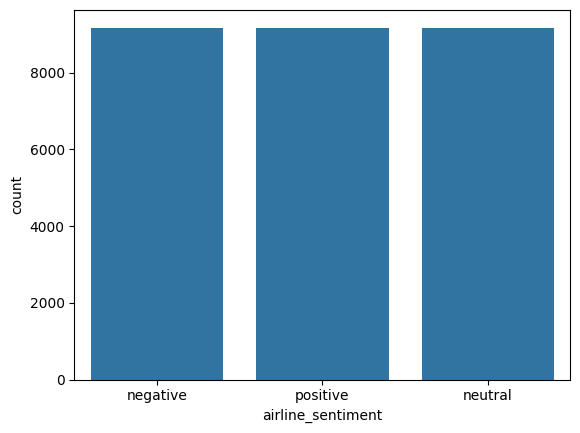

In [75]:
sns.countplot(x="airline_sentiment",data=df)
plt.show()

In [74]:
X=df.text
y=df["airline_sentiment"]

In [76]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=400)

In [77]:
xtrain.head()

14530    thanks for forcing me to check in my carry on ...
5758                    so for an extra luggage it cost 75
2812     not waiving change fees with the snow storm co...
14019    the worst air experience i have ever had and i...
3635                                            flight 280
Name: text, dtype: object

In [59]:
ytrain.head()

11214    negative
6201     positive
905      negative
52        neutral
13032     neutral
Name: airline_sentiment, dtype: object

In [67]:
naivebayes=Pipeline([("vectorizer",CountVectorizer()),("Transformer",TfidfTransformer()),("model",BernoulliNB())])
mlp=Pipeline([("Vectorizer",CountVectorizer()),("Transformer",TfidfTransformer()),("Model",MLPClassifier(hidden_layer_sizes=(10,10)))])

In [68]:
mlp.fit(xtrain,ytrain)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()),
                ('Model', MLPClassifier(hidden_layer_sizes=(10, 10)))])

In [78]:
naivebayes.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()), ('model', BernoulliNB())])

In [79]:
pred1=mlp.predict(xtest)
pred1

array(['positive', 'negative', 'positive', ..., 'neutral', 'negative',
       'neutral'], dtype='<U8')

In [82]:
df_results=pd.DataFrame({"Actual":ytest, "predicted":pred1})
df_results

,Actual,predicted
2744,positive,positive
3664,positive,negative
5420,positive,positive
3669,neutral,neutral
4424,neutral,neutral
...,...,...
5463,positive,positive
10691,positive,positive
6088,neutral,neutral
296,neutral,negative


In [83]:
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

    negative       0.88      0.96      0.92      1829
     neutral       0.93      0.88      0.90      1867
    positive       0.95      0.91      0.93      1811

    accuracy                           0.92      5507
   macro avg       0.92      0.92      0.92      5507
weighted avg       0.92      0.92      0.92      5507



<Axes: >

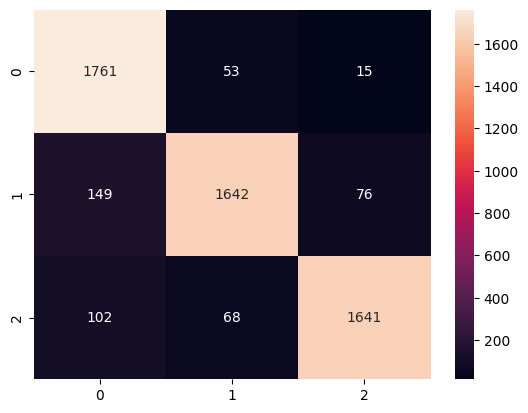

In [85]:
cm=confusion_matrix(ytest,pred1)
sns.heatmap(cm,annot=True,fmt='0.5g')

In [86]:
naivebayes.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()), ('model', BernoulliNB())])